In [3]:
from google.colab import files
data_to_load = files.upload()

Saving HD Risk Pricing Analyst - cleaned data.csv to HD Risk Pricing Analyst - cleaned data.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
import io
df = pd.read_csv(io.BytesIO(data_to_load['HD Risk Pricing Analyst - cleaned data.csv']))

In [6]:
df2 = df.drop(['Loss_code','Loss_description',],axis=1)
df2




,Claim Number,date_of_loss,Notifier,Notification_period,Inception_to_loss,Location_of_incident,Weather_conditions,Vehicle_mobile,Time_hour,Main_driver,PH_considered_TP_at_fault,Vechile_registration_present,Incident_details_present,Injury_details_present,TP_type_insd_pass_back,TP_type_insd_pass_front,TP_type_driver,TP_type_pass_back,TP_type_pass_front,TP_type_bike,TP_type_cyclist,TP_type_pass_multi,TP_type_pedestrian,TP_type_other,TP_type_nk,TP_injury_whiplash,TP_injury_traumatic,TP_injury_fatality,TP_injury_unclear,TP_injury_nk,TP_region_eastang,TP_region_eastmid,TP_region_london,TP_region_north,TP_region_northw,TP_region_outerldn,TP_region_scotland,TP_region_southe,TP_region_southw,TP_region_wales,TP_region_westmid,TP_region_yorkshire,Incurred,Capped Incurred
0,1,15/04/2003,PH,22,13,Main Road,NORMAL,Y,10,Other,n/k,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,-1000000.0,-1000000.0
1,2,20/04/2003,CNF,1,9,Main Road,WET,Y,18,Other,n/k,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1926.0,1926.0
2,3,24/04/2003,CNF,5,17,Main Road,WET,Y,16,Y,n/k,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,839.0,839.0
3,4,13/05/2003,CNF,1,23,Main Road,N/K,Y,14,Other,n/k,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,2427.0,2427.0
4,5,11/06/2003,CNF,1,48,Other,N/K,N,9,Other,n/k,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2170.0,2170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7686,7687,30/06/2015,Other,1,83,Main Road,NORMAL,N,16,Other,N,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,483.0,483.0
7687,7688,30/06/2015,Other,0,25,Minor Road,Not Applicable,Y,14,Y,N,1,1,1,0,0,1,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,29549.0,29549.0
7688,7689,30/06/2015,Other,0,60,Minor Road,NORMAL,Y,9,Other,N,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,3558.0,3558.0
7689,7690,30/06/2015,Other,1,253,Minor Road,NORMAL,N,19,Other,N,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,20675.0,20675.0


In [7]:
df3 = df2[df2[' Incurred ']>=0]

In [8]:
df3

,Claim Number,date_of_loss,Notifier,Notification_period,Inception_to_loss,Location_of_incident,Weather_conditions,Vehicle_mobile,Time_hour,Main_driver,PH_considered_TP_at_fault,Vechile_registration_present,Incident_details_present,Injury_details_present,TP_type_insd_pass_back,TP_type_insd_pass_front,TP_type_driver,TP_type_pass_back,TP_type_pass_front,TP_type_bike,TP_type_cyclist,TP_type_pass_multi,TP_type_pedestrian,TP_type_other,TP_type_nk,TP_injury_whiplash,TP_injury_traumatic,TP_injury_fatality,TP_injury_unclear,TP_injury_nk,TP_region_eastang,TP_region_eastmid,TP_region_london,TP_region_north,TP_region_northw,TP_region_outerldn,TP_region_scotland,TP_region_southe,TP_region_southw,TP_region_wales,TP_region_westmid,TP_region_yorkshire,Incurred,Capped Incurred
1,2,20/04/2003,CNF,1,9,Main Road,WET,Y,18,Other,n/k,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1926.0,1926.0
2,3,24/04/2003,CNF,5,17,Main Road,WET,Y,16,Y,n/k,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,839.0,839.0
3,4,13/05/2003,CNF,1,23,Main Road,N/K,Y,14,Other,n/k,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,2427.0,2427.0
4,5,11/06/2003,CNF,1,48,Other,N/K,N,9,Other,n/k,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2170.0,2170.0
5,6,24/06/2003,PH,16,23,Other,N/K,N,0,Other,n/k,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,7220.0,7220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7686,7687,30/06/2015,Other,1,83,Main Road,NORMAL,N,16,Other,N,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,483.0,483.0
7687,7688,30/06/2015,Other,0,25,Minor Road,Not Applicable,Y,14,Y,N,1,1,1,0,0,1,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,29549.0,29549.0
7688,7689,30/06/2015,Other,0,60,Minor Road,NORMAL,Y,9,Other,N,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,3558.0,3558.0
7689,7690,30/06/2015,Other,1,253,Minor Road,NORMAL,N,19,Other,N,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,20675.0,20675.0


In [9]:
print(list(df2.columns.values))

['Claim Number', 'date_of_loss', 'Notifier', 'Notification_period', 'Inception_to_loss', 'Location_of_incident', 'Weather_conditions', 'Vehicle_mobile', 'Time_hour', 'Main_driver', 'PH_considered_TP_at_fault', ' Vechile_registration_present ', ' Incident_details_present ', ' Injury_details_present ', ' TP_type_insd_pass_back ', ' TP_type_insd_pass_front ', ' TP_type_driver ', ' TP_type_pass_back ', ' TP_type_pass_front ', ' TP_type_bike ', ' TP_type_cyclist ', ' TP_type_pass_multi ', ' TP_type_pedestrian ', ' TP_type_other ', ' TP_type_nk ', ' TP_injury_whiplash ', ' TP_injury_traumatic ', ' TP_injury_fatality ', ' TP_injury_unclear ', ' TP_injury_nk ', ' TP_region_eastang ', ' TP_region_eastmid ', ' TP_region_london ', ' TP_region_north ', ' TP_region_northw ', ' TP_region_outerldn ', ' TP_region_scotland ', ' TP_region_southe ', ' TP_region_southw ', ' TP_region_wales ', ' TP_region_westmid ', ' TP_region_yorkshire ', ' Incurred ', ' Capped Incurred ']


In [10]:
print(df3['Notifier'].unique())
print(df3['Location_of_incident'].unique())
print(df3['Weather_conditions'].unique())
print(df3['Vehicle_mobile'].unique())
print(df3['Main_driver'].unique())
print(df3['PH_considered_TP_at_fault'].unique())

['CNF' 'PH' 'Other' 'TP' 'NamedDriver']
['Main Road' 'Other' 'Minor Road' 'Not Applicable' 'Home Address' 'n/k'
 'Car Park' 'Motorway']
['WET' 'N/K' 'NORMAL' 'Not Applicable' 'SNOW,ICE,FOG']
['Y' 'N' 'n/k']
['Other' 'Y' 'N']
['n/k' 'N' 'Y']


In [11]:
pure_numeric_df=df3.replace({'Notifier': ('CNF' ,'PH', 'Other', 'TP', 'NamedDriver')},{'Notifier': (1,0,3,4,2)})
pure_numeric_df=pure_numeric_df.replace({'Location_of_incident': ('Main Road', 'Other' ,'Minor Road' ,'Not Applicable', 'Home Address', 'n/k',
 'Car Park', 'Motorway')},{'Location_of_incident': (6,2,5,1,4,0,3,7)})
pure_numeric_df=pure_numeric_df.replace({'Weather_conditions': ('WET', 'N/K' ,'NORMAL' ,'Not Applicable', 'SNOW,ICE,FOG')},{'Weather_conditions': (3,0,2,1,4)})
pure_numeric_df=pure_numeric_df.replace({'Vehicle_mobile': ('Y', 'N' ,'n/k')},{'Vehicle_mobile': (2,0,1)})
pure_numeric_df=pure_numeric_df.replace({'PH_considered_TP_at_fault': ('Y', 'N' ,'n/k')},{'PH_considered_TP_at_fault': (2,0,1)})
pure_numeric_df=pure_numeric_df.replace({'Main_driver': ('Y', 'N' ,'Other')},{'Main_driver': (2,0,1)})

In [12]:
pure_numeric_df

,Claim Number,date_of_loss,Notifier,Notification_period,Inception_to_loss,Location_of_incident,Weather_conditions,Vehicle_mobile,Time_hour,Main_driver,PH_considered_TP_at_fault,Vechile_registration_present,Incident_details_present,Injury_details_present,TP_type_insd_pass_back,TP_type_insd_pass_front,TP_type_driver,TP_type_pass_back,TP_type_pass_front,TP_type_bike,TP_type_cyclist,TP_type_pass_multi,TP_type_pedestrian,TP_type_other,TP_type_nk,TP_injury_whiplash,TP_injury_traumatic,TP_injury_fatality,TP_injury_unclear,TP_injury_nk,TP_region_eastang,TP_region_eastmid,TP_region_london,TP_region_north,TP_region_northw,TP_region_outerldn,TP_region_scotland,TP_region_southe,TP_region_southw,TP_region_wales,TP_region_westmid,TP_region_yorkshire,Incurred,Capped Incurred
1,2,20/04/2003,1,1,9,6,3,2,18,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1926.0,1926.0
2,3,24/04/2003,1,5,17,6,3,2,16,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,839.0,839.0
3,4,13/05/2003,1,1,23,6,0,2,14,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,2427.0,2427.0
4,5,11/06/2003,1,1,48,2,0,0,9,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2170.0,2170.0
5,6,24/06/2003,0,16,23,2,0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,7220.0,7220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7686,7687,30/06/2015,3,1,83,6,2,0,16,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,483.0,483.0
7687,7688,30/06/2015,3,0,25,5,1,2,14,2,0,1,1,1,0,0,1,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,29549.0,29549.0
7688,7689,30/06/2015,3,0,60,5,2,2,9,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,3558.0,3558.0
7689,7690,30/06/2015,3,1,253,5,2,0,19,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,20675.0,20675.0


In [13]:
pure_numeric_df.describe(include='all')

,Claim Number,date_of_loss,Notifier,Notification_period,Inception_to_loss,Location_of_incident,Weather_conditions,Vehicle_mobile,Time_hour,Main_driver,PH_considered_TP_at_fault,Vechile_registration_present,Incident_details_present,Injury_details_present,TP_type_insd_pass_back,TP_type_insd_pass_front,TP_type_driver,TP_type_pass_back,TP_type_pass_front,TP_type_bike,TP_type_cyclist,TP_type_pass_multi,TP_type_pedestrian,TP_type_other,TP_type_nk,TP_injury_whiplash,TP_injury_traumatic,TP_injury_fatality,TP_injury_unclear,TP_injury_nk,TP_region_eastang,TP_region_eastmid,TP_region_london,TP_region_north,TP_region_northw,TP_region_outerldn,TP_region_scotland,TP_region_southe,TP_region_southw,TP_region_wales,TP_region_westmid,TP_region_yorkshire,Incurred,Capped Incurred
count,5890.000000,5890,5890.000000,5890.000000,5890.000000,5890.000000,5890.000000,5890.000000,5890.000000,5890.000000,5890.000000,5890.000000,5890.000000,5890.000000,5890.000000,5890.0,5890.000000,5890.000000,5890.000000,5890.000000,5890.000000,5890.0,5890.00000,5890.000000,5890.000000,5890.000000,5890.000000,5890.000000,5890.000000,5890.000000,5890.000000,5890.000000,5890.000000,5890.000000,5890.000000,5890.000000,5890.000000,5890.000000,5890.000000,5890.000000,5890.000000,5890.000000,5.890000e+03,5890.000000
unique,NaN,2876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,03/02/2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3761.419185,NaN,1.494907,6.633107,166.359083,5.093209,2.228183,0.994228,12.762818,1.494737,0.418506,0.998981,0.806621,0.249066,0.032088,0.0,0.659762,0.053820,0.074194,0.008659,0.000679,0.0,0.00017,0.090832,0.354669,0.329711,0.088795,0.004754,0.897623,0.562649,0.044482,0.059762,0.025976,0.030730,0.079626,0.040068,0.023090,0.132767,0.100509,0.067402,0.085059,0.091002,8.463485e+03,5876.114601
std,2264.994614,NaN,1.512295,38.102413,104.555350,1.169882,0.859192,0.971473,5.097548,0.595212,0.544408,0.031903,0.394981,0.432509,0.229781,0.0,0.557473,0.310549,0.275993,0.096252,0.026053,0.0,0.01303,0.390150,0.532537,0.710365,0.336433,0.073561,0.599891,0.662072,0.262680,0.315707,0.240643,0.217832,0.387803,0.245366,0.207214,0.455933,0.358413,0.346303,0.388401,0.397655,3.894933e+04,9813.411435
min,2.000000,NaN,0.000000,-18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,1754.250000,NaN,0.000000,0.000000,73.000000,5.000000,2.000000,0.000000,9.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.552500e+02,455.250000
50%,3726.500000,NaN,1.000000,1.000000,160.000000,5.000000,2.000000,1.000000,13.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.822500e+03,1822.500000
75%,5739.750000,NaN,3.000000,2.000000,253.000000,6.000000,3.000000,2.000000,17.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000

In [14]:
pure_numeric_df[[' Incurred ',' Capped Incurred ','Notifier', 'Notification_period', 'Inception_to_loss', 'Location_of_incident', 'Weather_conditions', 'Vehicle_mobile', 'Time_hour', 'Main_driver', 'PH_considered_TP_at_fault', ' Vechile_registration_present ', ' Incident_details_present ', ' Injury_details_present ', ' TP_type_insd_pass_back ', ' TP_type_insd_pass_front ', ' TP_type_driver ', ' TP_type_pass_back ', ' TP_type_pass_front ', ' TP_type_bike ', ' TP_type_cyclist ', ' TP_type_pass_multi ', ' TP_type_pedestrian ', ' TP_type_other ', ' TP_type_nk ', ' TP_injury_whiplash ', ' TP_injury_traumatic ', ' TP_injury_fatality ', ' TP_injury_unclear ', ' TP_injury_nk ', ' TP_region_eastang ', ' TP_region_eastmid ', ' TP_region_london ', ' TP_region_north ', ' TP_region_northw ', ' TP_region_outerldn ', ' TP_region_scotland ', ' TP_region_southe ', ' TP_region_southw ', ' TP_region_wales ', ' TP_region_westmid ', ' TP_region_yorkshire ']].corr()

,Incurred,Capped Incurred,Notifier,Notification_period,Inception_to_loss,Location_of_incident,Weather_conditions,Vehicle_mobile,Time_hour,Main_driver,PH_considered_TP_at_fault,Vechile_registration_present,Incident_details_present,Injury_details_present,TP_type_insd_pass_back,TP_type_insd_pass_front,TP_type_driver,TP_type_pass_back,TP_type_pass_front,TP_type_bike,TP_type_cyclist,TP_type_pass_multi,TP_type_pedestrian,TP_type_other,TP_type_nk,TP_injury_whiplash,TP_injury_traumatic,TP_injury_fatality,TP_injury_unclear,TP_injury_nk,TP_region_eastang,TP_region_eastmid,TP_region_london,TP_region_north,TP_region_northw,TP_region_outerldn,TP_region_scotland,TP_region_southe,TP_region_southw,TP_region_wales,TP_region_westmid,TP_region_yorkshire
Incurred,1.000000,0.550688,-0.010179,0.003499,0.007759,0.002554,-0.039443,-0.098965,0.008733,-0.026275,-0.011941,0.005499,-0.001823,0.097361,0.066429,NaN,0.099359,0.105968,0.156448,0.055941,-0.002671,NaN,0.012763,0.199252,-0.074752,0.126362,0.253754,0.192817,0.027026,0.046278,0.070613,0.057180,0.017220,0.043585,0.040167,0.024315,0.040008,0.102690,0.033892,0.039270,0.060526,0.079320
Capped Incurred,0.550688,1.000000,-0.023116,-0.009096,-0.003125,0.042672,-0.049367,-0.197405,0.020098,-0.002261,-0.049206,0.013404,0.005960,0.161759,0.109657,NaN,0.251756,0.288663,0.378721,0.082895,-0.003726,NaN,0.054090,0.284687,-0.196449,0.458364,0.368986,0.142105,-0.099789,-0.036441,0.105295,0.083079,0.081760,0.070217,0.164476,0.106952,0.118394,0.113328,0.064628,0.101822,0.170294,0.189550
Notifier,-0.010179,-0.023116,1.000000,0.110974,-0.007233,-0.073972,-0.236955,-0.005452,-0.084488,-0.059265,-0.091564,-0.007147,0.073827,-0.035834,-0.021764,NaN,0.077907,0.027882,-0.002553,-0.003780,0.000088,NaN,0.012970,-0.005116,-0.073346,-0.018037,-0.014964,-0.008941,0.033959,0.046619,-0.019520,0.013797,0.007596,-0.001329,-0.010456,0.007414,-0.005585,-0.009116,-0.022552,0.001790,-0.008369,-0.026619
Notification_period,0.003499,-0.009096,0.110974,1.000000,-0.030741,-0.207462,-0.199522,0.039092,-0.155910,-0.069498,-0.018358,-0.002403,-0.047422,-0.072075,-0.003950,NaN,-0.008196,0.006075,0.003816,0.020545,0.020436,NaN,-0.001585,-0.008038,-0.043045,0.011101,-0.006214,0.022978,-0.060400,-0.001704,-0.010500,0.012396,0.030282,-0.000196,-0.017088,-0.014683,-0.004798,-0.013617,-0.019184,-0.009206,-0.012027,-0.011615
Inception_to_loss,0.007759,-0.003125,-0.007233,-0.030741,1.000000,0.012944,0.022640,0.019995,-0.010033,0.004695,-0.016707,0.013600,0.004922,-0.018294,-0.028632,NaN,0.019294,-0.002096,0.009027,-0.009893,0.024284,NaN,0.000080,-0.006036,-0.017381,0.003168,-0.005314,-0.018635,-0.007276,-0.008743,0.029930,-0.005666,0.000102,-0.000760,-0.008172,0.005694,-0.012633,-0.014857,0.002345,-0.017618,0.029179,-0.008954
Location_of_incident,0.002554,0.042672,-0.073972,-0.207462,0.012944,1.000000,0.195584,-0.094254,0.159349,0.074229,-0.029797,0.007094,0.024315,0.132986,0.022351,NaN,0.043427,0.006288,0.030644,0.007912,-0.002077,NaN,0.010101,0.019023,-0.014913,0.036164,0.032898,-0.015016,0.021826,0.022385,0.032369,0.023076,-0.010411,-0.008576,-0.005508,0.010058,0.018439,0.028687,0.015316,-0.014672,0.009456,0.011695
Weather_conditions,-0.039443,-0.049367,-0.236955,-0.199522,0.022640,0.195584,1.000000,-0.017138,0.082573,0.061453,0.049564,0.039456,-0.028070,0.027077,-0.018171,NaN,-0.055916,-0.052398,-0.018415,-0.019789,-0.006924,NaN,-0.003461,-0.047657,0.082881,-0.035371,-0.023110,-0.062840,0.006126,-0.026627,0.012953,-0.004583,-0.040992,-0.003902,-0.012750,-0.005519,0.023813,-0.030534,0.034142,-0.011179,-0.003725,0.001836
Vehicle_mobile,-0.098965,-0.197405,-0.005452,0.039092,0.019995,-0.094254,-0.017138,1.000000,-0.017970,0.046641,-0.055151,-0.016626,0.037361,-0.336056,-0.070676,NaN,-0.024948,-0.047939,-0.073769,0.024143,0.013573,NaN,-0.013337,-0.076124,-0.051513,-0.115352,-0.118967,-0.051892,-0.032192,-0.017126,-0.036258,-0.034863,-0.010980,-0.050517,-0.026274,-0.011852,-0.048263,-0.078395,-0.029058,-0.031652,-0.028401,-0.039519
Time_hour,0.008733

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


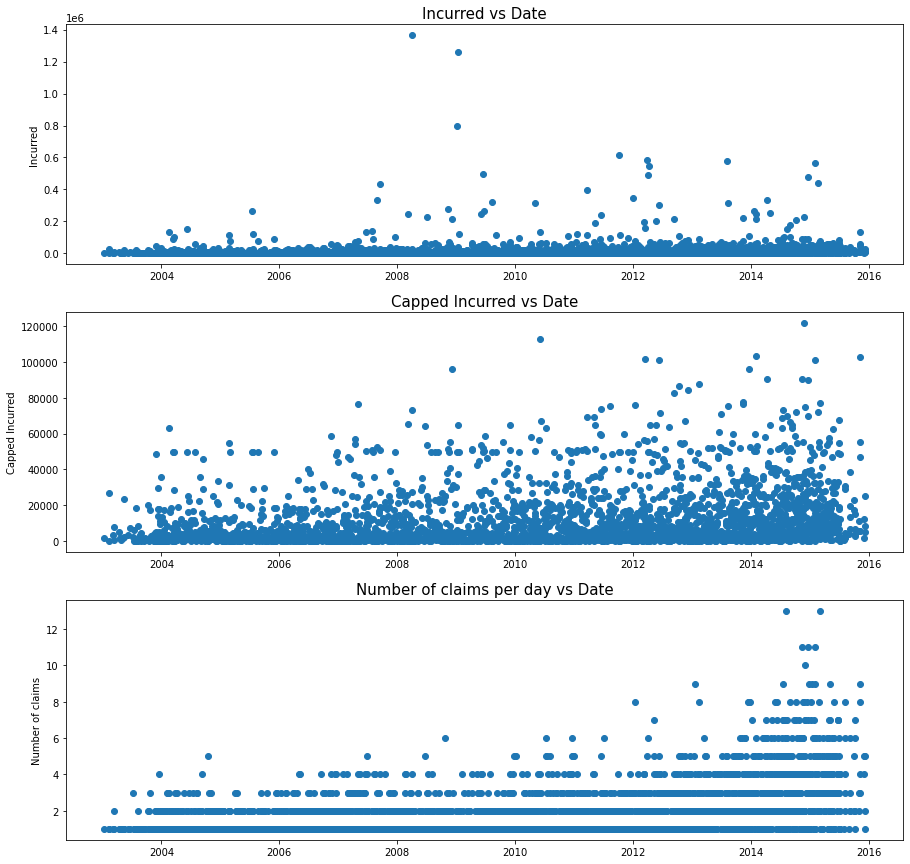

In [15]:
df3['Number of claims']=df3['Claim Number']*0+1
grouped_by_day_df3=df3.groupby(['date_of_loss'],as_index=False).sum()
grouped_by_day_df3['Date'] = pd.to_datetime(grouped_by_day_df3['date_of_loss'])

f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize =(15,15))
ax1.plot_date(grouped_by_day_df3['Date'],grouped_by_day_df3[' Incurred '],xdate=True)
ax1.set_title('Incurred vs Date',fontsize=15)
ax1.set_ylabel('Incurred')
ax2.plot_date(grouped_by_day_df3['Date'],grouped_by_day_df3[' Capped Incurred '],xdate=True)
ax2.set_title('Capped Incurred vs Date',fontsize=15)
ax2.set_ylabel('Capped Incurred')
ax3.plot_date(grouped_by_day_df3['Date'],grouped_by_day_df3['Number of claims'],xdate=True)
ax3.set_title('Number of claims per day vs Date',fontsize=15)
ax3.set_ylabel('Number of claims')
plt.show()

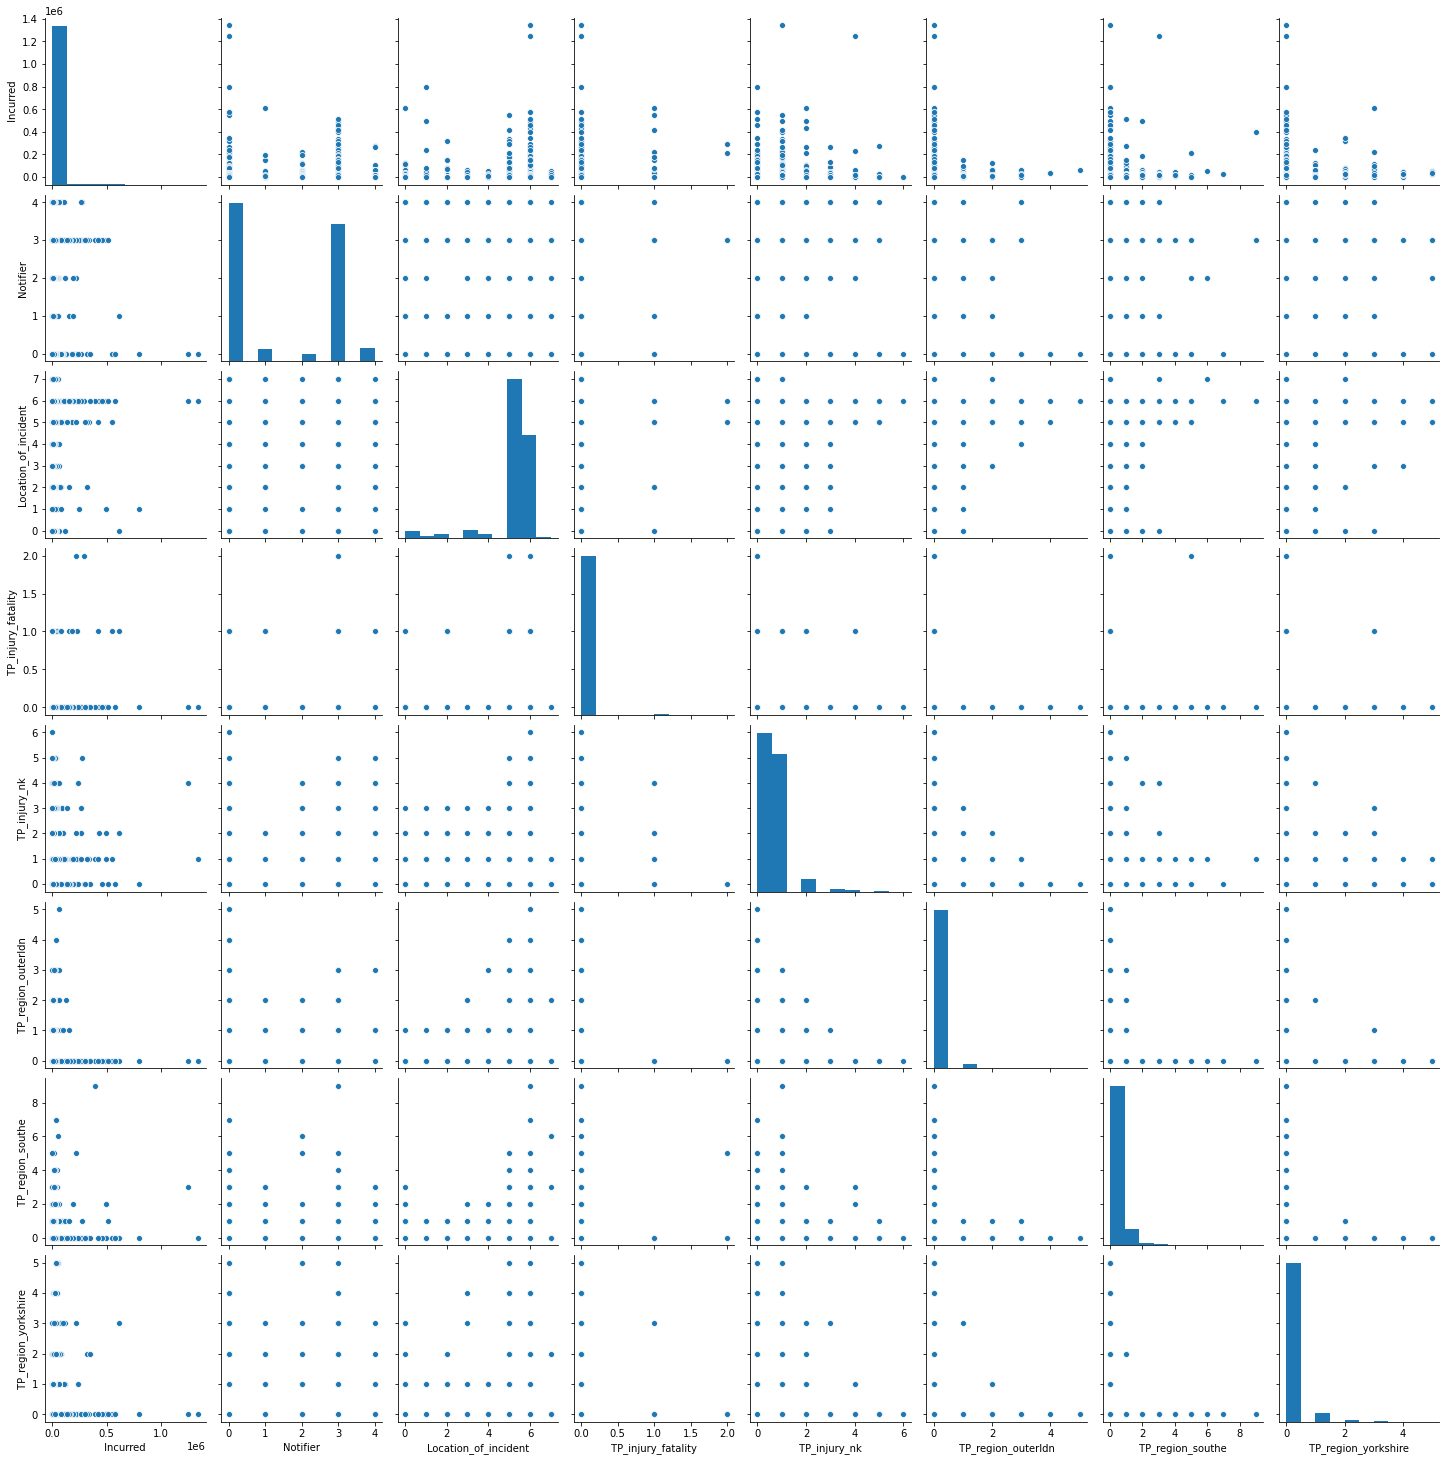

In [16]:
weather_data=pure_numeric_df[[' Incurred ','Notifier', 'Location_of_incident', ' TP_injury_fatality ',  ' TP_injury_nk ',  ' TP_region_outerldn ',   ' TP_region_southe ', ' TP_region_yorkshire ']]
sns.pairplot(weather_data);